## Wine Data Exploration

### Preliminary Wrangling/Exploration

In [110]:
#import all the required packages
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
from scipy.stats import norm
import warnings
warnings.filterwarnings("ignore")

In [111]:
#import data
red_wine_data = pd.read_csv('winequality-red.csv', delimiter = ';')
white_wine_data = pd.read_csv('winequality-white.csv',delimiter = ';')

In [112]:
#explore the data dimension
red_wine_data.shape

(1599, 12)

In [113]:
#check for null values
red_wine_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [114]:
#since all numerical variables features, describe() method is used
red_wine_data.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [115]:
red_wine_data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [116]:
white_wine_data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [117]:
print(white_wine_data.shape, red_wine_data.shape)

(4898, 12) (1599, 12)


In [118]:
print(white_wine_data.duplicated().sum(), red_wine_data.duplicated().sum())

937 240


In [119]:
#drop any duplicated values
white_wine_data = white_wine_data.drop_duplicates()
red_wine_data = red_wine_data.drop_duplicates()

In [120]:
print(white_wine_data.duplicated().sum(), red_wine_data.duplicated().sum())

0 0


The data contains 11 physico chemical properties of the wine for each type all with float data strucutre, with the quality rating as only int. There seems to be not be null values from the .info() method but there were 937 and 240 duplicated vaues from for white wine data and red wine data respectively ,which is about 19% and 15% of the datasets needed to be removed. It seems very unlikely that 2 types of wines will have the exact same physico chemical properties without being the same type.

In [121]:
#join_data for red and white wine
red_wine_data['type'] = 'red'
white_wine_data['type'] = 'white'
join_data = pd.concat([red_wine_data,white_wine_data])

In [122]:

join_data.shape

(5320, 13)

In [123]:
join_data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,type
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,red
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,red
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,red
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,red
5,7.4,0.66,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4,5,red


We labeled the data either red or white wine type and after the joining we have 5320 wine entry with 12 features including 11 numerical and 1 categorical and quality as the main feature of interest.

Since these are important physico chemical properties of wine to ensure its quality, we would like to understand what attributes have some effects to the wine quality score.

In [124]:
def label_data(xaxis, yaxis, title):
    '''
    label plot data and title with given xaxis,yaxis, and title string.
    '''
    y_label = plt.ylabel(yaxis)
    x_label = plt.xlabel(xaxis)
    title = plt.title(title)
    return y_label, x_label, title

def data_legend(color1, color2, label1, label2,legend_location):
    '''
    label data legend witht the given colors and labels string and the legend location
    '''
    color1_patch = mpatches.Patch(color = color1, label = label1)
    color2_patch = mpatches.Patch(color = color2, label = label2)
    return plt.legend(handles = [color1_patch, color2_patch], loc = legend_location)

## Univariable Exploration

Before diving into features interaction, I would like to see the distribution of the quality score.

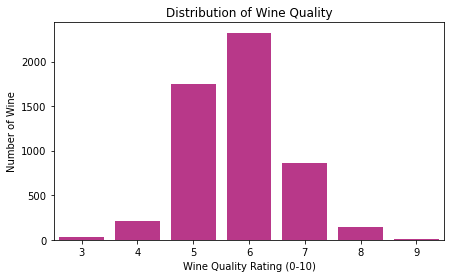

In [125]:
plt.figure(figsize = [7,4])
color = sb.set_palette(reversed(sb.color_palette("RdPu", 2)), 3)
sb.countplot(x = 'quality',data = join_data, color = sb.color_palette()[0])
label_data('Wine Quality Rating (0-10)','Number of Wine','Distribution of Wine Quality');

> Seems like the center of wine is closer to 6. However, the center between 5 and 6 is expected.

> The maximum score for white wine is 9.

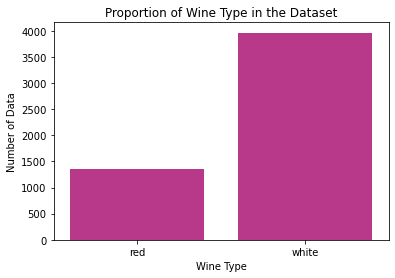

In [126]:
sb.countplot(x ='type', data = join_data, color = sb.color_palette()[0])
label_data('Wine Type','Number of Data','Proportion of Wine Type in the Dataset') ;

White wine is about 3 times more abundant than red.

Since alcohol is more viscous than water. Wine with higher alcohol content will have a fuller, richer body, while a lower alcohol wine will taste lighter and more delicate on the palete. Lets take a quick look at the distribution of the alcohol feature.

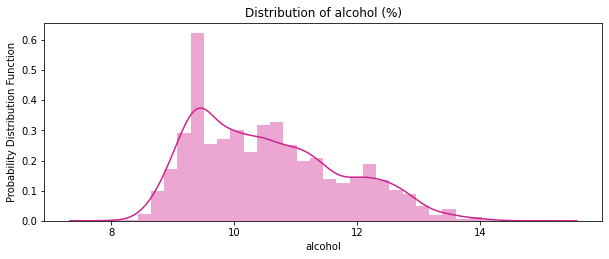

In [127]:
ax = plt.figure(figsize = [10, 8])
plt.subplot(2,1,1)
plt.title('Distribution of alcohol (%)')
plt.ylabel('Probability Distribution Function')
sb.distplot(join_data['alcohol']);


The chart shows an alcohol content distribution and  it seems  to follow the poisson distribution.

Let's take a look at the univariable distribution of other numerical features.

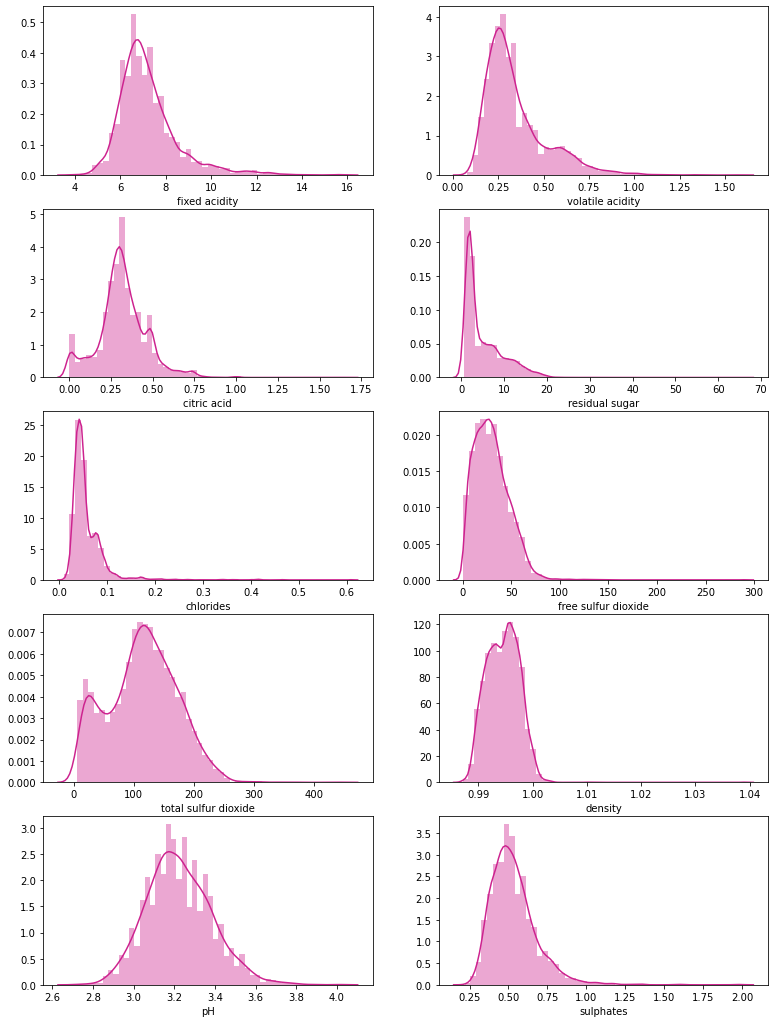

In [128]:
fig, ax = plt.subplots(5, 2, figsize=(13,18))
sb.distplot(join_data[join_data.columns[0]], hist=True, kde=True, label='All values', ax=ax[0, 0])
sb.distplot(join_data[join_data.columns[1]], hist=True, kde=True, label='All values', ax=ax[0, 1])
sb.distplot(join_data[join_data.columns[2]], hist=True, kde=True, label='All values', ax=ax[1, 0])
sb.distplot(join_data[join_data.columns[3]], hist=True, kde=True, label='All values', ax=ax[1, 1])
sb.distplot(join_data[join_data.columns[4]], hist=True, kde=True, label='All values', ax=ax[2, 0])
sb.distplot(join_data[join_data.columns[5]], hist=True, kde=True, label='All values', ax=ax[2, 1])
sb.distplot(join_data[join_data.columns[6]], hist=True, kde=True, label='All values', ax=ax[3, 0])
sb.distplot(join_data[join_data.columns[7]], hist=True, kde=True, label='All values', ax=ax[3, 1])
sb.distplot(join_data[join_data.columns[8]], hist=True, kde=True, label='All values', ax=ax[4, 0])
sb.distplot(join_data[join_data.columns[9]], hist=True, kde=True, label='All values', ax=ax[4, 1]);

>Many features follows normal distribution such as pH, sulphates, fixed acidity, free sulfure dioxide.

>Some features follows poisson distribution such as residual sugar, volatile acidity.

>Some features follows multimodal normal distribution such as total sulfure dioxide, density, and citric acid.

>However, none of seems to be odd in terms of data entry error.

SO2 helps protect the wine from the oxidation and spoilage. This is critical when SO2 is lost through aeration or binding. Since the total sulfure dioxide abaiable according to US Alcohol and Tobacco Tax and Trade Bureau the maximum allowable concentration of a bottled wine is 350ppm (mg/L). According to a paper from Iowa state, when a wine where free SO2 is unusally small percentage of the total SO2, this is an indication that there is something making the wine chemically or microbially unstable. Therefore, we will engineer another feature which is the proportion of Free SO2.

## Bivariate Exploration

Plot all the pairplot against each other. On the diagnoal will be the plot of variable against itself, so histogram is generated instead of scatterplot.



In [129]:
join_data['free_SO2_proportion'] = join_data['free sulfur dioxide'] / join_data['total sulfur dioxide']

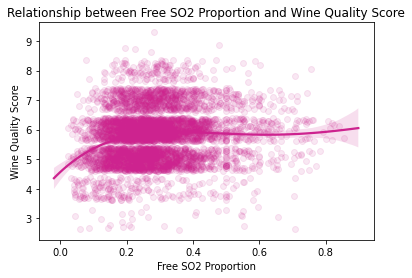

In [130]:
sb.regplot(x = 'free_SO2_proportion', y = 'quality',data =  join_data, y_jitter=0.4, scatter_kws={'alpha':0.1}, order=4)
plt.title('Relationship between Free SO2 Proportion and Wine Quality Score')
plt.ylabel('Wine Quality Score')
plt.xlabel('Free SO2 Proportion');

This shows a slight increase in free SO2 proportion to wine quality however, the correlation seems to flat off after 0.2. If we query the data after Free SO2 Proportion of less than 0.2, maybe the correlation will be more pronouced.

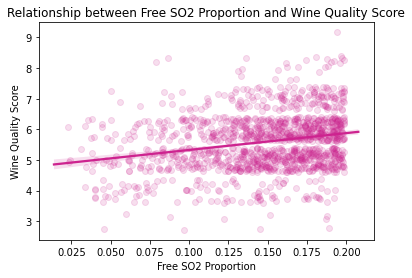

In [131]:
sb.regplot(x = 'free_SO2_proportion', y = 'quality', data = join_data.query('free_SO2_proportion < 0.20'), y_jitter=0.4, scatter_kws={'alpha':0.15})
plt.title('Relationship between Free SO2 Proportion and Wine Quality Score')
plt.ylabel('Wine Quality Score')
plt.xlabel('Free SO2 Proportion');

As we engineered a new feature, Free SO2 Proportion, we do not need Total sulfur dioxide and free sulfure dioxide columns.

In [132]:
join_data = join_data.drop(columns = ['total sulfur dioxide', 'free sulfur dioxide'])

In [133]:
join_data.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'density', 'pH', 'sulphates', 'alcohol', 'quality', 'type',
       'free_SO2_proportion'],
      dtype='object')

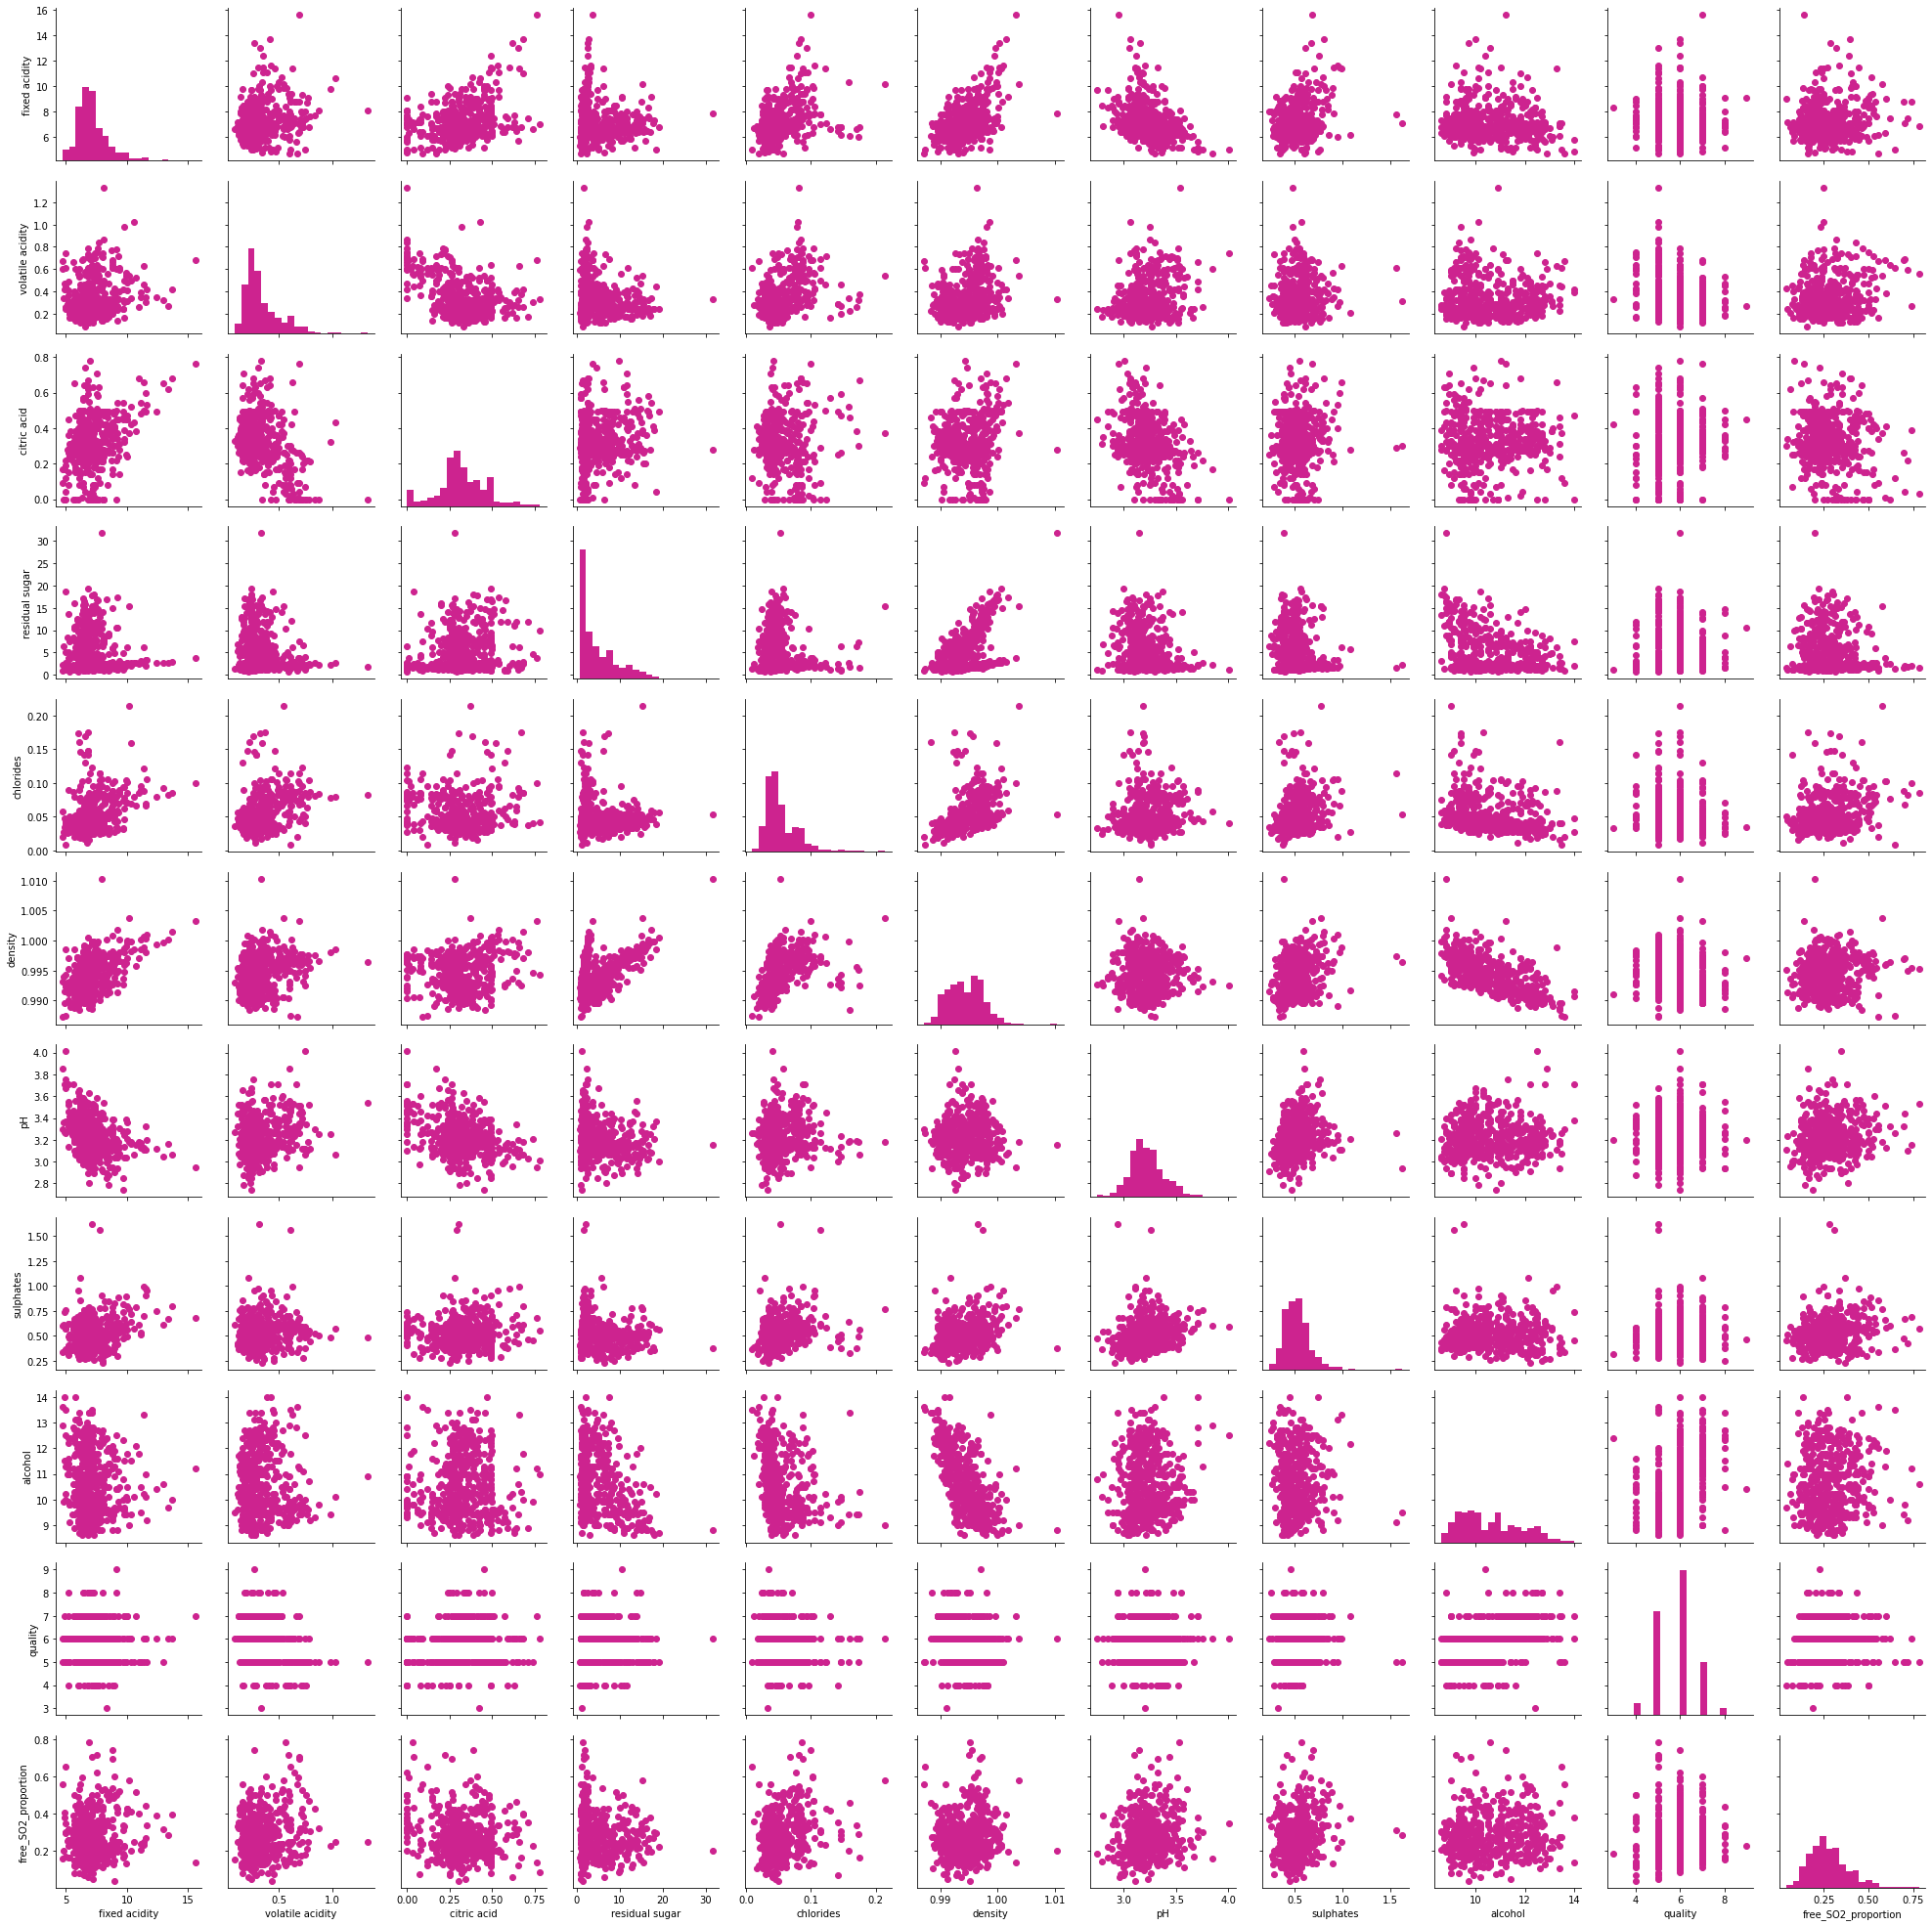

In [134]:
num_col = [col for col in join_data.columns if col not in ['type']]
samples = np.random.choice(join_data.shape[0], 500, replace = False)
wine_samp = join_data.iloc[samples,:]

g = sb.PairGrid(data = wine_samp, vars = num_col)
g = g.map_diag(plt.hist, bins = 20);
g.map_offdiag(plt.scatter)

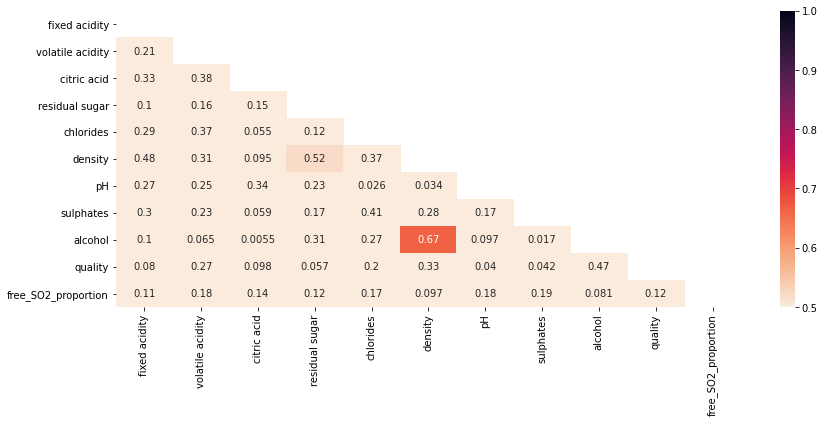

In [135]:
matrix = np.triu(join_data.corr())
plt.figure(figsize=[14,12])
plt.subplot(2,1,1)
sb.heatmap(join_data.corr().abs(), cmap= sb.cm.rocket_r, vmin=0.5, mask=matrix, annot=True);

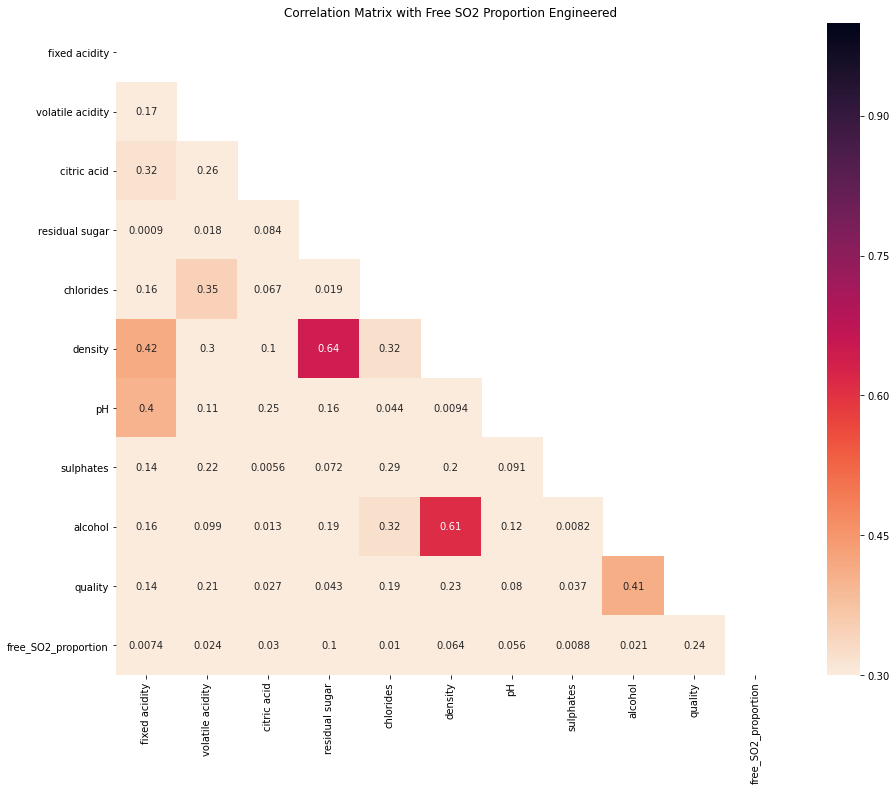

In [136]:
plt.figure(figsize=[15,12])
matrix = np.triu(join_data.query('free_SO2_proportion < 0.20').corr().abs())
sb.heatmap(join_data.query('free_SO2_proportion < 0.20').corr().abs(), cmap= sb.cm.rocket_r, vmin=0.3,annot=True, mask=matrix)
plt.title('Correlation Matrix with Free SO2 Proportion Engineered');

Let's take a look at boxplot to see the relationship between categorical variables and numerical variables.

<Figure size 1440x1440 with 0 Axes>

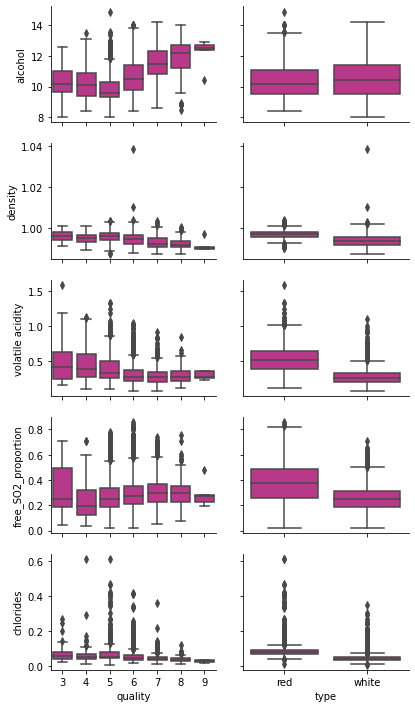

In [137]:
# plot matrix of numeric features against categorical features.
# can use a larger sample since there are fewer plots and they're simpler in nature.

samples = np.random.choice(join_data.shape[0], 500, replace = False)
wine_samp = join_data.iloc[samples,:]

def boxgrid(x, y,**kwargs):
    """ Quick hack for creating box plots with seaborn's PairGrid. """
    default_color = sb.color_palette()[0]
    sb.boxplot(x,y,color=default_color)

plt.figure(figsize = [20, 20]);
g = sb.PairGrid(data = join_data, y_vars = ['alcohol', 'density', 'volatile acidity', 'free_SO2_proportion','chlorides'],x_vars = ['quality','type'],
                size = 2, aspect = 1.5)
g.map(boxgrid);

From observing correlation matrix and the boxplot the top 3 correlated features are alcohol, density and volatile acidity. Alcohol has a slight possitive correlation whereas density and volatile acidity have slight negative correlation.

Alcohol, density, free SO2 proportion, and chlorides seem to have correlation with the quality.Besides alcohol content, density, volatile acidity, and free SO2 proportion, and chlorides are generally higher in red wine vs. white. Let's plot these boxplot with cateogry included to see any patterns.

When we filtered the data of free_SO2_proportion of less than 0.2, the correlation went from lower than 0.1 to 0.24 being the second most correlated features to quality. This is an interesting feature to keep in mind when performing further analysis.

## Multivariate Exploration

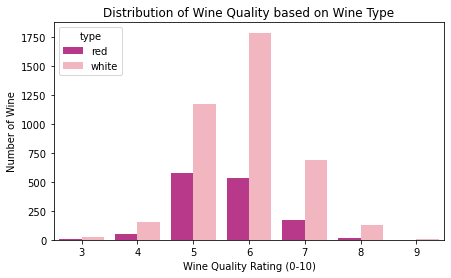

In [138]:
plt.figure(figsize = [7,4])
color = sb.set_palette(reversed(sb.color_palette("RdPu", 2)), 3)
sb.countplot(x = 'quality',data = join_data, color = color, hue='type')
label_data('Wine Quality Rating (0-10)','Number of Wine','Distribution of Wine Quality based on Wine Type');


> white wine has more frequency in all quality score. 

> Seems like the center of red wine data is closer to 5 and the white wine is closer to 6. However, the center between 5 and 6 is expected.

> The maximum score for white wine is 9 and red wine is 8.

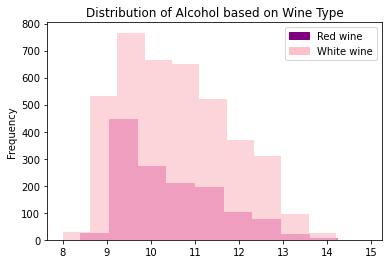

In [139]:
plt.hist(join_data.query('type == "red"')['alcohol'], alpha=0.5, label='red')
plt.hist(join_data.query('type == "white"')['alcohol'], alpha=0.5, label='white')
plt.ylabel('Frequency')
data_legend('purple', 'pink', 'Red wine','White wine', 1)
plt.title('Distribution of Alcohol based on Wine Type');

The chart shows an alcohol distribution with break down of different type of wine. Seems like the alcohol content distribution of two types of wine follow the poisson distribution.

In [140]:
join_data.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'density', 'pH', 'sulphates', 'alcohol', 'quality', 'type',
       'free_SO2_proportion'],
      dtype='object')

Let's take a look at pH and its direbution related to quality and wine type to see if there are any trends

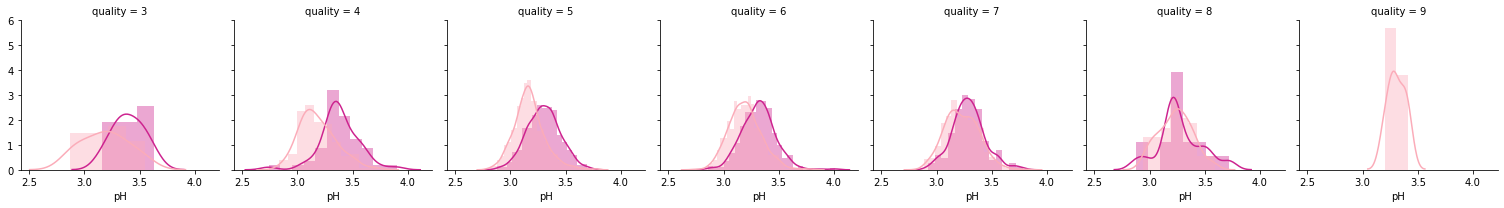

In [141]:
g = sb.FacetGrid(join_data, col = 'quality', hue="type", palette=color)
g = (g.map(sb.distplot, "pH"))

As the quality increases, the center of the pH data between two types of wine starts to merge closer and the distribution peak gets taller. Eventually, the pH for both type centers around 3.25.

Alcohol, density, free SO2 proportion, and chlorides seem to have correlation with the quality from earlier plots .Besides alcohol content, density, volatile acidity, and free SO2 proportion, and chlorides are generally higher in red wine vs. white. Let's plot these boxplot with rating and type to see the trend.

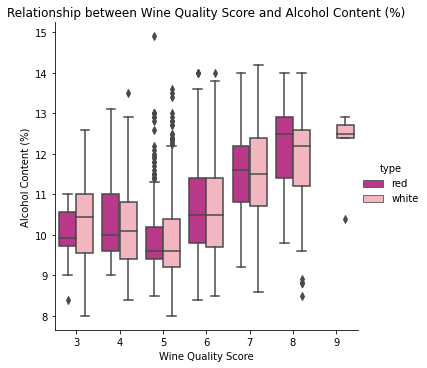

In [142]:
sb.catplot(x="quality", y="alcohol", hue="type", kind="box", data=join_data)
plt.title('Relationship between Wine Quality Score and Alcohol Content (%)')
plt.ylabel('Alcohol Content (%)')
plt.xlabel('Wine Quality Score');

Seems that the correlation between density and alcohol content stems from the same principle. Since more alcohol content contributes to lower wine density, this correlation is probably due to multicollinearity. Therefore, it should be removed for model will be created further.

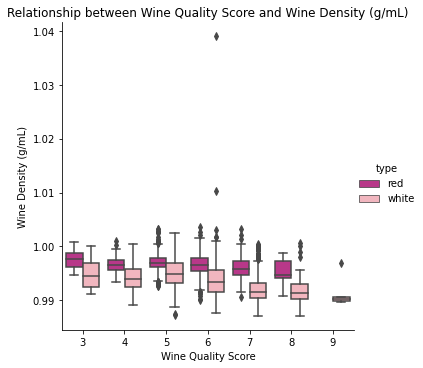

In [143]:
sb.catplot(x="quality", y="density", hue="type", kind="box", data=join_data)
plt.title('Relationship between Wine Quality Score and Wine Density (g/mL)')
plt.ylabel('Wine Density (g/mL)')
plt.xlabel('Wine Quality Score');

According to decanter.com, the presnce of high amounts of volatile acidity is considered undesirable. Volatile acidity adds character, complexiity, and interest, often in possitive manner such as aroma. However, with no volatile acidity included, wine can indicate unclean winemaking process.

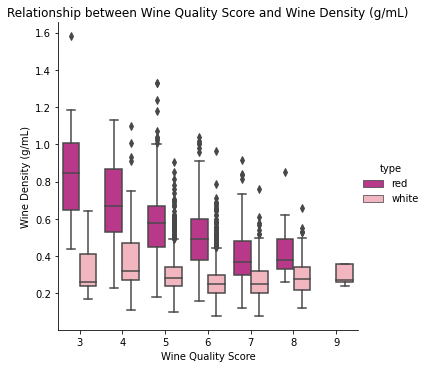

In [144]:
sb.catplot(x="quality", y="volatile acidity", hue="type", kind="box", data=join_data)
plt.title('Relationship between Wine Quality Score and Wine Density (g/mL)')
plt.ylabel('Wine Density (g/mL)')
plt.xlabel('Wine Quality Score');

Free SO2 Proportion is higher in red wine, but seems to have no correlation with the quality score.

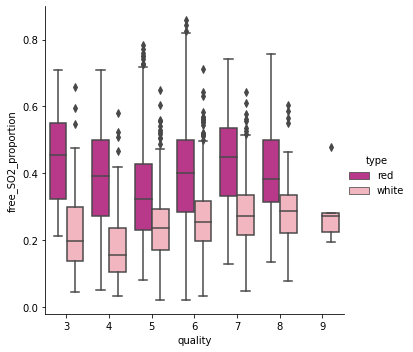

In [145]:
sb.catplot(x="quality", y="free_SO2_proportion", hue="type", kind="box", data=join_data);

There seems to be a weak negative correlation for chlorides, and it is much higher in red wine than white wine.

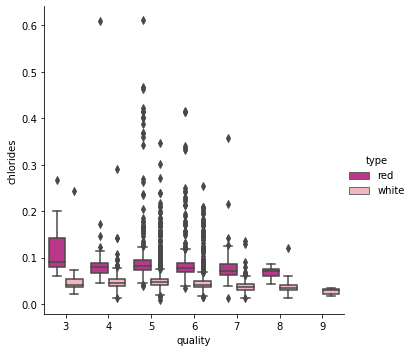

In [146]:
sb.catplot(x="quality", y="chlorides", hue="type", kind="box", data=join_data);

Does not seems like residual sugar has any correlation with quality rating, but white wine has significantly higher residual sugar than red wine.

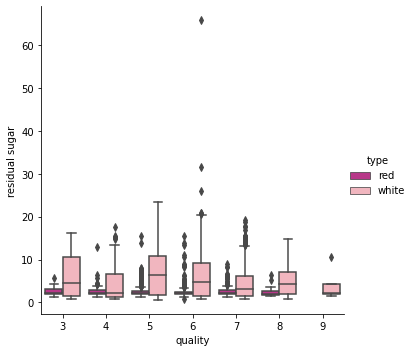

In [147]:
sb.catplot(x="quality", y="residual sugar", hue="type", kind="box", data=join_data);

Convert quality score into bucket for more visualization either 3 categories: low, medium, high and 2 categories: low, high.

In [148]:
quality_data_3_categories = []
for quality in join_data['quality']:
    if quality < 4:
        quality = "low"
    elif quality < 7:
        quality = "medium"
    else:
        quality = "high"
    quality_data_3_categories.append(quality)

In [149]:
quality_data_2_categories = ["high" if quality > 5 else "low" for quality in join_data['quality']]

In [150]:
join_data['rating_2_buckets'] = quality_data_2_categories

From the graph the higest quality rated alcohol tends to be where alcohol is around 13 and 14 % and volatile acidity is between 0.3 and 0.6 g/L.

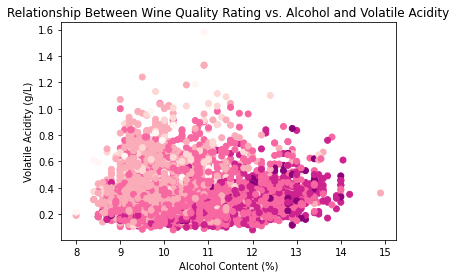

In [151]:
plt.scatter(x = 'alcohol', y = 'volatile acidity', c = 'quality',cmap = 'RdPu', data = join_data)
plt.xlabel('Alcohol Content (%)')
plt.ylabel('Volatile Acidity (g/L)')
plt.title('Relationship Between Wine Quality Rating vs. Alcohol and Volatile Acidity');


Since alcohol and density are correlated, we will focus on other features for our modeling process.

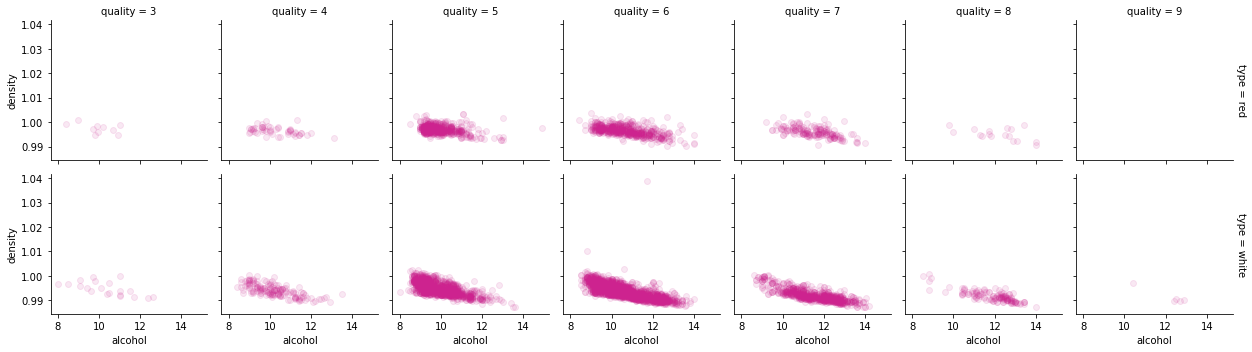

In [152]:
j = sb.FacetGrid(data = join_data, col = 'quality', row = 'type', size = 2.5,
                margin_titles = True)
j.map(plt.scatter, 'alcohol', 'density',alpha=0.1);

In [153]:
join_data['quality_3_categories'] = quality_data_3_categories

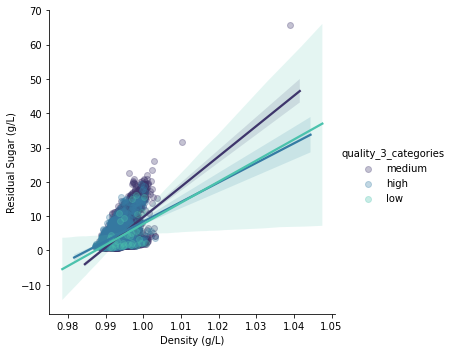

In [154]:
sb.lmplot(x = 'density', y = 'residual sugar', data = join_data, hue = 'quality_3_categories', palette = "mako",scatter_kws={'alpha':0.3})
plt.xlabel('Density (g/L)')
plt.ylabel('Residual Sugar (g/L)');

The relationship is not clear when we try residual sugar vs density when cateogirze the wine rating into 3 buckets.

We will convert type of wine categorical column to numerical by one hot encoding for modeling process.

In [155]:
join_data['white_wine'] = pd.get_dummies(join_data,columns = ['type'],drop_first=True)['type_white']

In [156]:
join_data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,density,pH,sulphates,alcohol,quality,type,free_SO2_proportion,rating_2_buckets,quality_3_categories,white_wine
0,7.4,0.70,0.00,1.9,0.076,0.9978,3.51,0.56,9.4,5,red,0.323529,low,medium,0
1,7.8,0.88,0.00,2.6,0.098,0.9968,3.20,0.68,9.8,5,red,0.373134,low,medium,0
2,7.8,0.76,0.04,2.3,0.092,0.9970,3.26,0.65,9.8,5,red,0.277778,low,medium,0
3,11.2,0.28,0.56,1.9,0.075,0.9980,3.16,0.58,9.8,6,red,0.283333,high,medium,0
5,7.4,0.66,0.00,1.8,0.075,0.9978,3.51,0.56,9.4,5,red,0.325000,low,medium,0


In [157]:
X_col = [col  for col in join_data.columns if col not in ['quality','type', 'rating_2_buckets', 'quality_3_categories']]

In [158]:
X,y = join_data[X_col] ,pd.Series(join_data['quality'])

## Modeling

we are going to shift gear to perform principal component analysis and data scaling to understand how good our features are for predicting the target variables and also use decision tree to visualize decisions and examine what are the important parameters that leads to good wine rating.


In [159]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import accuracy_score, r2_score
from sklearn import tree
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler, scale
from sklearn.naive_bayes import GaussianNB
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import Ridge
from sklearn.metrics import explained_variance_score, mean_absolute_error
from sklearn.cluster import KMeans

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
tree_classifier = DecisionTreeRegressor( max_depth= 3, min_samples_split=25, random_state=42)

In [160]:
clf = make_pipeline(StandardScaler(), PCA(),Ridge())
pca = PCA()
pca.fit(scale(X_train))
X_transformed = clf.fit(X_train,y_train)

In [161]:
variance_explained = np.cumsum(np.round(pca.explained_variance_ratio_,4)*100)

In [162]:
x = [i+1 for i in range(len(variance_explained))]  

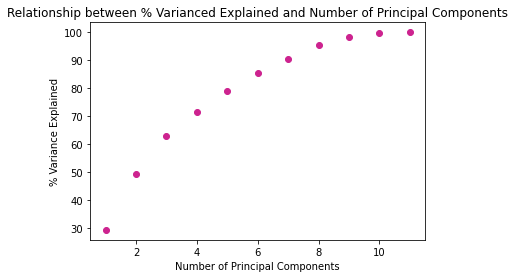

In [163]:
plt.scatter(x,variance_explained)
plt.xlabel('Number of Principal Components')
plt.ylabel('% Variance Explained')
plt.title('Relationship between % Varianced Explained and Number of Principal Components');

In [164]:
pca = clf.named_steps['pca']
y_pred = clf.predict(X_test)

In [165]:
y_pred_round = [round(i) for i in y_pred]

In [166]:
mean_absolute_error(y_test,y_pred)

0.5658269827047328

In [167]:
explained_variance_score(y_test,y_pred)

0.30926278791054385

This is considered low since the best score would be 1 and 0 is equilavent to guessing.However, if we take a look at mean absolute error it is about 0.56. meaning on average our model predict the wine quality off by 0.5 score, practically speaking, this is not a bad result at all.

In [168]:
clf_trial = make_pipeline(StandardScaler(),PCA())

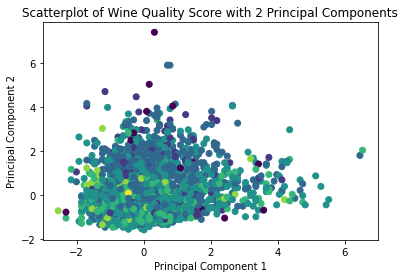

In [169]:
plt.scatter(PCA(scale(X_train)).n_components[:,0],PCA(scale(X_train)).n_components[:,1], c = y_train)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('Scatterplot of Wine Quality Score with 2 Principal Components');

From the explained variance score these features does not seem like a good model to predict the quality rating feature. However, from the dataset we know that these wines are from different vineyard, we could try to cluster these into 3 clusters to possibly help categorize the type for the future.

In [170]:
clf2 = make_pipeline(StandardScaler(),PCA(n_components=2), KMeans(n_clusters=3, random_state=42))

In [171]:
kmeans = clf2.fit(X_train)

Let's say if wine are from different cultivars, e.g. 3, lets see how we would be able to cluster these based on their principal components.

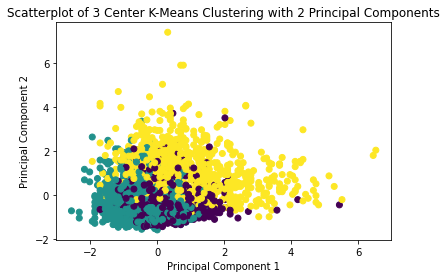

In [172]:
plt.scatter(x = PCA(scale(X_train)).n_components[:,0], y = PCA(scale(X_train)).n_components[:,1], c = kmeans.predict(X_train))
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('Scatterplot of 3 Center K-Means Clustering with 2 Principal Components');

In [173]:
tree_classifier_fit = tree_classifier.fit(X_train, y_train)

In [174]:
y_pred = tree_classifier.predict(X_test)

In [175]:
r2_score(y_test, y_pred)

0.24403425537883272

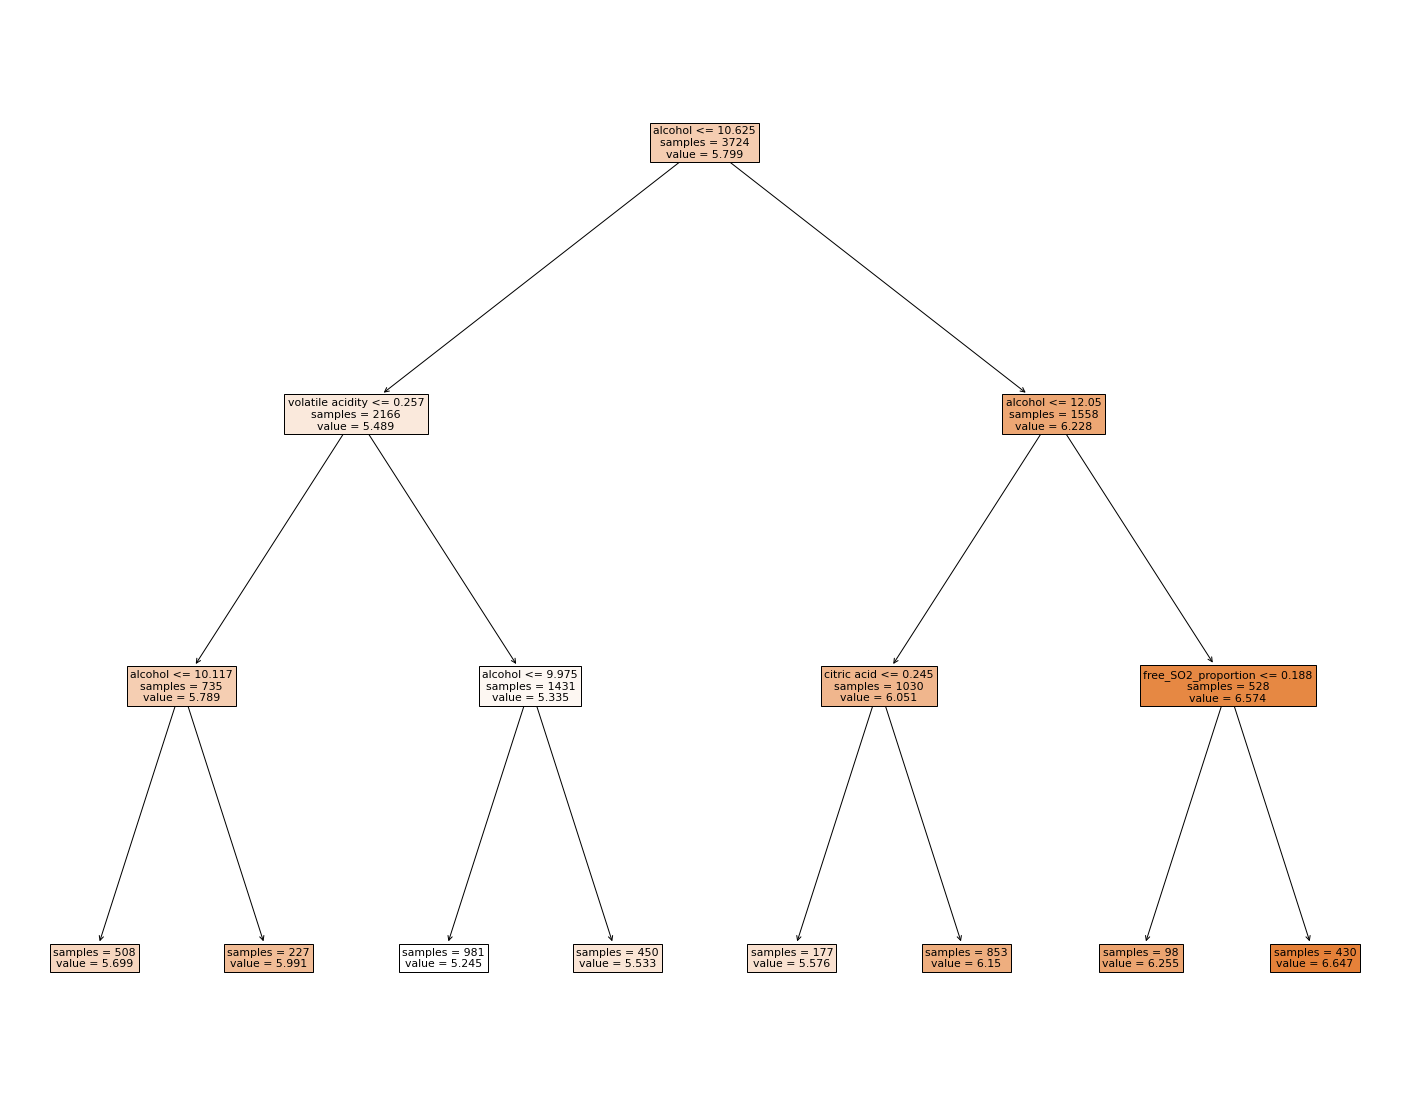

In [176]:
#accuracy_score(y_test, y_pred)
tree_classifier_fit.feature_importances_

fig = plt.figure(figsize=(25,20))
_ = tree.plot_tree(tree_classifier_fit, 
                   feature_names=X.columns,
                   impurity=False,
                   filled=True)
plt.savefig('tree.png')

The r2 score is also not quite good 0.24. However, looking into feature importances, we see the alcohol content accounts for 79% and volatile acidity accounts for 12%.

In [177]:
for i in range(len(tree_classifier_fit.feature_importances_)):
    print(X.columns[i],round(tree_classifier_fit.feature_importances_[i],3))

fixed acidity 0.0
volatile acidity 0.127
citric acid 0.061
residual sugar 0.0
chlorides 0.0
density 0.0
pH 0.0
sulphates 0.0
alcohol 0.797
free_SO2_proportion 0.015
white_wine 0.0
